In [1]:
# Imports
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Read data from .csv
data = pd.read_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Original_Data/13_WARMIŃSKO-MAZURSKIE.csv')
df = pd.DataFrame(data)

# Show original data
data

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,5,Dyson,45.0,K,2.0
1,1,9,Dyson,NaN,K,1.0
2,2,11,Beko,44.0,K,2.0
3,3,10,Electrolux,40.0,bd.,2.0
4,4,5,Electrolux,62.0,K,2.5
...,...,...,...,...,...,...
525,525,4,Dyson,36.0,bd.,3.0
526,526,6,Beko,18.0,M,3.5
527,527,8,Electrolux,43.0,K,2.0
528,528,5,Electrolux,30.0,K,3.0


# Basic Analysis
## Cleaning data

In [2]:
Marki_uniq = pd.DataFrame({'Marka':sorted(data['Marka'].unique().tolist())})
Wiek_bez_nan = pd.DataFrame(data[(data[['Wiek kupującego']] > 0).all(axis=1)])
Plec_bez_bd = pd.DataFrame(data[(data[['Płeć kupującego']] != 'bd.').all(axis=1)])

# Save to .csv file
Wiek_bez_nan.to_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Wiek_dane.csv')
Marki_uniq.to_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Marki_unikatowe.csv')
Plec_bez_bd.to_csv('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Płeć_dane.csv')

## Analysis by single variables and relative analysis
### Dni od zakupu

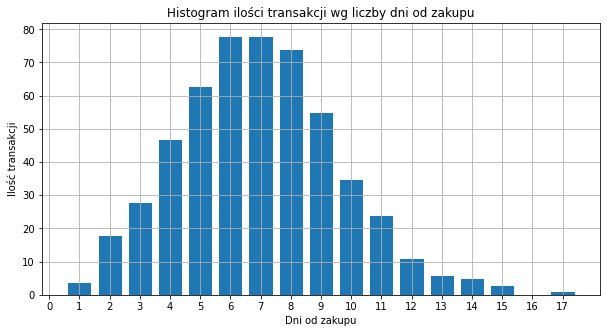

In [3]:
Dni_od_zakupu = pd.DataFrame({'Dni od zakupu':sorted(data['Dni od zakupu'].unique().tolist()),
                     'Ilość':data.groupby(['Dni od zakupu']).size().tolist()})

plt.figure(figsize=(10,5))
plt.bar(Dni_od_zakupu['Dni od zakupu'], Dni_od_zakupu['Ilość'], edgecolor = 'white')

# Plot formatting
plt.grid(True)
plt.xticks(np.arange(0,18, step=1))
plt.xlabel('Dni od zakupu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram ilości transakcji wg liczby dni od zakupu')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Dni_od_zakupu_hist')

### Marka

In [4]:
Marki_uniq

,Marka
0,Beko
1,Dyson
2,Electrolux
3,Samsung
4,Tefal


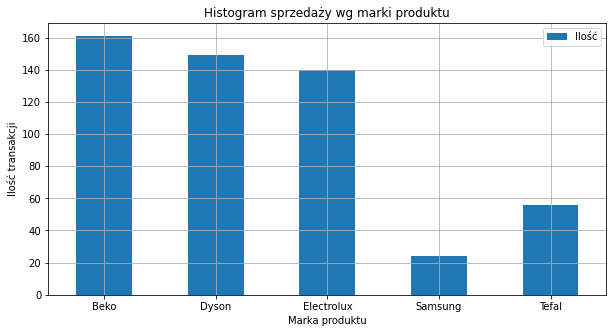

In [5]:
# Make the histogram using a list of lists
Marki_all = pd.DataFrame({'Marka':sorted(data['Marka'].unique().tolist()),
                     'Ilość':data.groupby(['Marka']).size().tolist()})

Marki_all.plot.bar(x='Marka', y='Ilość', figsize=(10,5))

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg marki produktu')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Marka_hist')

### Wiek kupującego

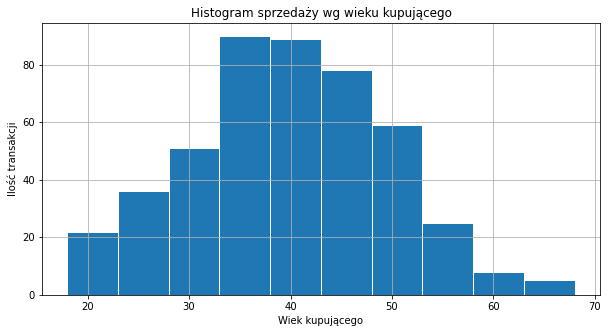

In [6]:
Marki_wiek = pd.DataFrame({'Wiek kupującego':Wiek_bez_nan['Wiek kupującego'], 'Marka':Wiek_bez_nan['Marka']})

plt.figure(figsize=(10,5))
fig = plt.hist(Wiek_bez_nan["Wiek kupującego"], edgecolor = 'white', bins=10)

# bins = 10 (min wiek: 18; max wiek: 68; podział na 10 przedziałów daje interwały 5 letnie)

# Plot formatting
plt.grid(True)
plt.xlabel('Wiek kupującego')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg wieku kupującego')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Wiek_kupującego_hist')

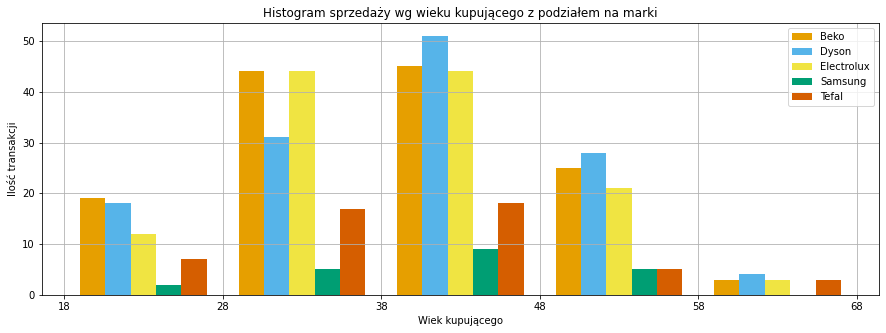

In [7]:
# Make a separate list for each brand
x1 = list(Wiek_bez_nan[Wiek_bez_nan['Marka'] == 'Beko']['Wiek kupującego'])
x2 = list(Wiek_bez_nan[Wiek_bez_nan['Marka'] == 'Dyson']['Wiek kupującego'])
x3 = list(Wiek_bez_nan[Wiek_bez_nan['Marka'] == 'Electrolux']['Wiek kupującego'])
x4 = list(Wiek_bez_nan[Wiek_bez_nan['Marka'] == 'Samsung']['Wiek kupującego'])
x5 = list(Wiek_bez_nan[Wiek_bez_nan['Marka'] == 'Tefal']['Wiek kupującego'])

# Assign colors for each brand
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Beko', 'Dyson', 'Electrolux','Samsung', 'Tefal']
         
# Make the histogram using a list of lists
plt.figure(figsize=(15,5))
fig = plt.hist([x1, x2, x3, x4, x5], bins=5, color=colors, label=names)

# bins = 5 (min wiek: 18; max wiek: 68; podział na 5 przedziałów daje interwały 10 letnie)

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(np.linspace(18,68,6))
plt.xlabel('Wiek kupującego')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg wieku kupującego z podziałem na marki')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Wiek_kupującego_podział_marka_hist')

### Podział na płeć

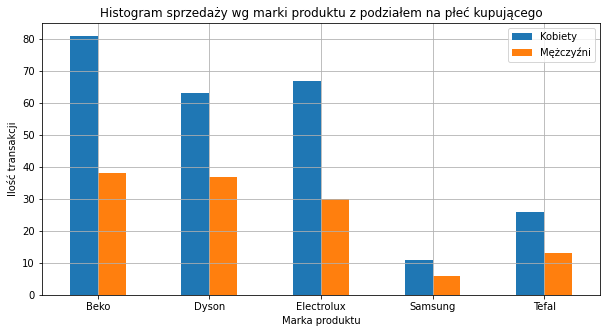

In [8]:
# Make a separate list for each gender
x1 = Plec_bez_bd[Plec_bez_bd['Płeć kupującego'] == 'K']
x2 = Plec_bez_bd[Plec_bez_bd['Płeć kupującego'] == 'M']
x_all = pd.DataFrame({'Marka':sorted(x1['Marka'].unique().tolist()),
                     'Kobiety':x1.groupby(['Marka']).size().tolist(),
                     'Mężczyźni':x2.groupby(['Marka']).size().tolist()})

# Assign colors for each gender
colors = ['#E69F00', '#56B4E9']
names = ['K', 'M']
         
# Make the histogram using a list of lists
x_all.plot.bar(x='Marka', y={'Kobiety','Mężczyźni'}, figsize=(10,5))

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0.4,4.4, step=0.8))
plt.xticks([0, 1, 2, 3, 4], list(x_all['Marka']), rotation=0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg marki produktu z podziałem na płeć kupującego')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Płeć_kupującego_podział_marka_hist')

<Figure size 720x360 with 0 Axes>

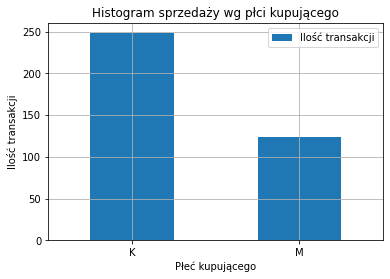

In [9]:
plt.figure(figsize=(10,5))
K = (Plec_bez_bd[(Plec_bez_bd[['Płeć kupującego']] == 'K').all(axis=1)])['Płeć kupującego']
M = (Plec_bez_bd[(Plec_bez_bd[['Płeć kupującego']] == 'M').all(axis=1)])['Płeć kupującego']

df = pd.DataFrame({'Płeć kupującego':['K', 'M'], 'Ilość transakcji':[K.size, M.size]})
fig = df.plot.bar(x='Płeć kupującego', y='Ilość transakcji', rot=0)

# Plot formatting
plt.grid(True)
plt.xlabel('Płeć kupującego')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg płci kupującego')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Płeć_kupującego_hist')

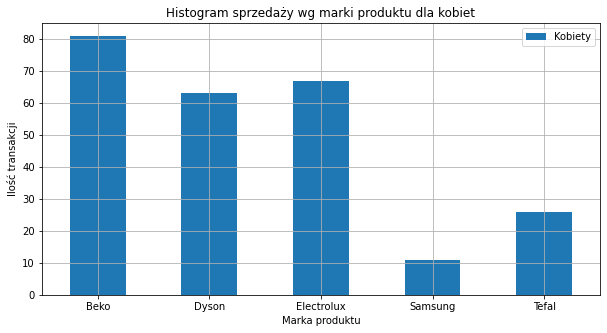

In [10]:
# Make the histogram using a list of lists
x_all.plot.bar(x='Marka', y='Kobiety', figsize=(10,5))

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg marki produktu dla kobiet')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Kobiety_podział_marka_hist')

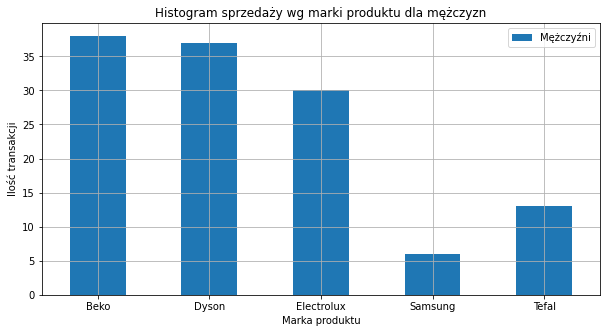

In [11]:
# Make the histogram using a list of lists
x_all.plot.bar(x='Marka', y='Mężczyźni', figsize=(10,5))

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('Marka produktu')
plt.ylabel('Ilość transakcji')
plt.title('Histogram sprzedaży wg marki produktu dla mężczyzn')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Mężczyźni_podział_marka_hist')

### Ocena

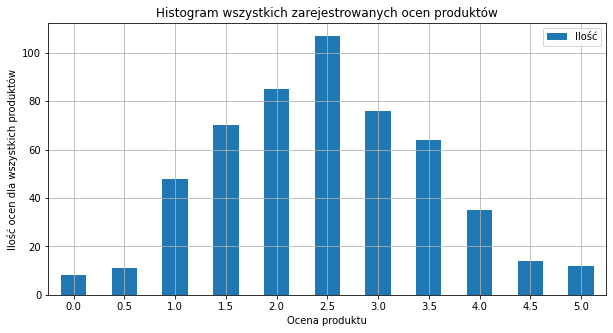

In [12]:
# Make the histogram using a list of lists
Oceny_all = pd.DataFrame({'Ocena':sorted(data['Ocena'].unique().tolist()),
                     'Ilość':data.groupby(['Ocena']).size().tolist()})

Oceny_all.plot.bar(x='Ocena', y='Ilość', figsize=(10,5))

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.xlabel('Ocena produktu')
plt.ylabel('Ilość ocen dla wszystkich produktów')
plt.title('Histogram wszystkich zarejestrowanych ocen produktów')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Ocena_hist')

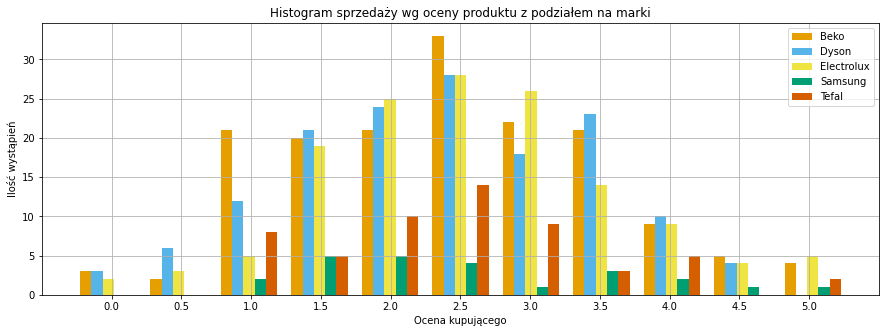

In [13]:
# Make a separate list for each brand
x1 = data[data['Marka'] == 'Beko']['Ocena']
x2 = data[data['Marka'] == 'Dyson']['Ocena']
x3 = data[data['Marka'] == 'Electrolux']['Ocena']
x4 = data[data['Marka'] == 'Samsung']['Ocena']
x5 = data[data['Marka'] == 'Tefal']['Ocena']
         
# Assign colors for each brand
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Beko', 'Dyson', 'Electrolux','Samsung', 'Tefal']
oceny = np.linspace(0,5,11)

# Make the histogram using a list of lists
plt.figure(figsize=(15,5))
plt.hist([x1, x2, x3, x4, x5], bins = 11, color=colors, label=names)

# Plot formatting
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0,4.4, step=0.5))
plt.xticks(np.linspace(0.25,4.75,11), oceny, rotation=0)
plt.xlabel('Ocena kupującego')
plt.ylabel('Ilość wystąpień')
plt.title('Histogram sprzedaży wg oceny produktu z podziałem na marki')

#save to file
plt.savefig('C:/Users/Dell/Documents/Studia_sem7/Analiza-i-Bazy-Danych/Lab_6/Analysis_Data/Ocena_podział_marka_hist')